In [10]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import path
input_dir = "Lab01-Data/lab1_Ex2_data"
output_dict = {}

In [11]:
training_samples = [] 
sample_indexes = [] # 标号
class_indexes = [] # 属于哪个类
filename_list = []
for file in os.listdir(input_dir):  # 遍历目标文件夹图片
        file_name = input_dir + '//' + file.strip()  # 取图片完整路径
        if file.strip() == "test.png":
            test_sample = mpimg.imread(file_name)
        else:
            training_samples.append(mpimg.imread(file_name))
            sample_indexes.append(file.strip()[0:4])
            class_indexes.append(int(file.strip()[5]))
            filename_list.append(file.strip())
print(len(training_samples))
print(sample_indexes[0:10])

1000
['0001', '0002', '0003', '0004', '0005', '0006', '0007', '0008', '0009', '0010']


In [12]:
A1 = [np.linalg.norm(sample-test_sample) for sample in training_samples] # get Euclidean distance for each sample
output_dict['Q1'] = np.array(A1)
print(output_dict['Q1'][0:10]) # print 10 data

[12.27523   10.7552395 11.927136  11.531348  12.686645  12.567896
 11.480589  12.47848   13.727116  11.983578 ]


In [13]:
to_sort = list(zip(A1, sample_indexes, class_indexes, filename_list)) #  合并两个list
print(to_sort[0:10])
to_sort.sort(key=lambda k:k[0]) # 根据距离进行排序，而类别跟着走
print(to_sort[0:10])

[(12.27523, '0001', 0, '0001_0_001.png'), (10.7552395, '0002', 0, '0002_0_002.png'), (11.927136, '0003', 0, '0003_0_003.png'), (11.531348, '0004', 0, '0004_0_004.png'), (12.686645, '0005', 0, '0005_0_005.png'), (12.567896, '0006', 0, '0006_0_006.png'), (11.480589, '0007', 0, '0007_0_007.png'), (12.47848, '0008', 0, '0008_0_008.png'), (13.727116, '0009', 0, '0009_0_009.png'), (11.983578, '0010', 0, '0010_0_010.png')]
[(5.4197187, '0451', 4, '0451_4_051.png'), (6.252019, '0488', 4, '0488_4_088.png'), (6.436218, '0467', 4, '0467_4_067.png'), (6.4747972, '0496', 4, '0496_4_096.png'), (6.7966948, '0410', 4, '0410_4_010.png'), (7.3378806, '0408', 4, '0408_4_008.png'), (7.3529596, '0441', 4, '0441_4_041.png'), (7.999438, '0415', 4, '0415_4_015.png'), (8.083863, '0498', 4, '0498_4_098.png'), (8.128952, '0902', 9, '0902_9_002.png')]


In [14]:
output_dict['Q2_1'] = to_sort[0][1]
output_dict['Q2_2'] = to_sort[0][2]

In [15]:
top_three = to_sort[0:3]
output_dict['Q3_1'] = set([k[1] for k in top_three ]) # set 是没有顺序可言的，所以打印时不一定是真正的顺序
# output_dict['Q3_1'] = [k[1] for k in top_three ] # 如果想要输出有顺序的，使用list
from collections import Counter
top_three = [str(k[2]) for k in to_sort[0:3]]
print(top_three)
class_counter = Counter(top_three)
print(class_counter.most_common(1)[0])
output_dict['Q3_2'] = int(class_counter.most_common(1)[0][0])

['4', '4', '4']
('4', 3)


In [16]:
print(output_dict)

{'Q1': array([12.27523  , 10.7552395, 11.927136 , 11.531348 , 12.686645 ,
       12.567896 , 11.480589 , 12.47848  , 13.727116 , 11.983578 ,
       11.313987 , 10.933691 , 13.10759  , 12.82461  , 11.895136 ,
       11.402161 , 11.777597 , 13.032606 , 10.41695  , 10.23072  ,
       12.440805 , 13.021246 , 11.617192 , 12.524738 , 12.320896 ,
       10.986775 , 12.267706 , 11.345401 , 11.528763 , 11.117323 ,
       12.318753 , 11.405664 , 12.407321 , 12.328908 , 12.822589 ,
       12.339812 , 12.970507 , 11.464521 , 12.40073  , 12.353972 ,
       12.484727 , 13.3288555, 12.835593 , 12.575804 , 12.339974 ,
       12.4098425, 12.033295 , 12.922906 , 10.966089 , 10.609221 ,
       12.914998 , 12.519682 , 11.647189 , 12.123349 , 11.990611 ,
       11.372052 , 12.040884 , 11.372475 , 11.928806 , 11.499988 ,
       11.9142275, 10.873941 , 11.627113 , 11.246995 , 12.023124 ,
       12.783052 , 11.654958 , 11.328055 , 10.748918 , 12.000552 ,
       12.098165 , 12.724633 , 13.049634 , 12.689426 , 

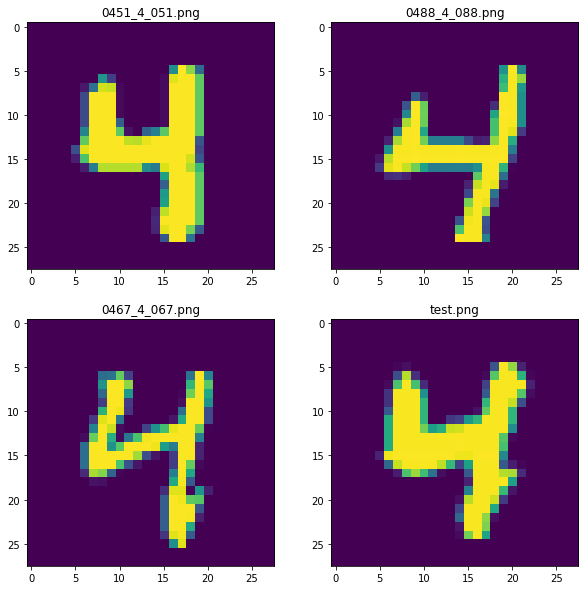

In [17]:
result_images = [k[3] for k in to_sort[0:3]]
result_images.append("test.png")
fig = plt.figure()
columns = 2
rows = 2
fig.set_size_inches(10, 10)
for i in range(1, columns*rows +1):
    img_name = input_dir + "/" +result_images[i-1]
    img = plt.imread(img_name)
    fig.add_subplot(rows, columns, i)
    plt.title(result_images[i-1])
    plt.imshow(img)
plt.show()
fig.savefig('Ex2.png', dpi=100)